# **Extracting Waveform and Spectrogram**


In [8]:
import torch
import torchaudio
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchaudio.__version__)

1.12.0+cu113
0.12.0+cu113


In [10]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

In [12]:
waveform, sample_rate = torchaudio.load("download.wav")

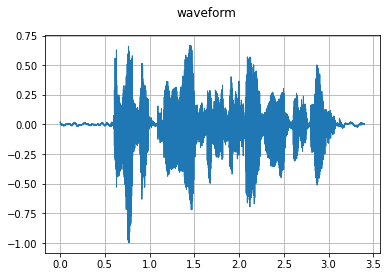

In [13]:
plot_waveform(waveform, sample_rate)

In [14]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

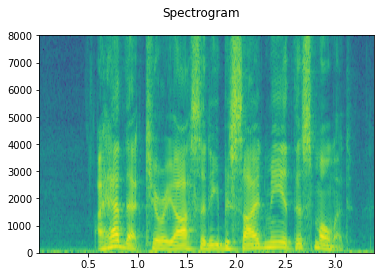

In [15]:
plot_specgram(waveform, sample_rate)

# **Language Modeling**

In [ ]:
!wget https://sourceforge.net/projects/cmusphinx/files/Acoustic%20and%20Language%20Models/US%20English/en-70k-0.2.lm.gz
!gzip -d en-70k-0.2.lm.gz
!pip install https://github.com/kpu/kenlm/archive/master.zip

In [ ]:
# Install the language model library ...
!pip install https://github.com/kpu/kenlm/archive/master.zip

In [25]:
import kenlm
model = kenlm.Model('en-70k-0.2.lm')

In [34]:
for i in [
    "I read a book last night, I like to read",
    "I red a book last night, I like to read",
    "I read a book last night, I like to reed"
    ]:
  print(f"P({i}) =", model.score(i, bos = True, eos = True))

P(I read a book last night, I like to read) = -317.7187194824219
P(I red a book last night, I like to read) = -322.0182189941406
P(I read a book last night, I like to reed) = -321.2997741699219
